In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import matplotlib.animation as animation

In [2]:
def gen_hex_grid(n):
    n = n if n % 2 == 1 else n + 1
    start = -n / 2.0 + 1 / 2
    end = n / 2 - 1/2
    
    x_even = np.linspace(start, end, n)
    x_odd = np.linspace(start + 1/2, end - 1/2, n - 1)
    
    y_values = np.linspace(start, end, n)
    
    x = []
    y = []
    
    for i in range(n):
        curr_y = y_values[i]
        if (i % 2 == 0) :
            x += list(x_even)
            y += [curr_y for j in range(n)]
        else:
            x += list(x_odd)
            y += [curr_y for j in range(n - 1)]
            
    C = [i for i in range(len(x))]
        
    return x, y

In [3]:
def gen_adj_dict(n):
    n = n if n % 2 == 1 else n + 1
    
    index = 0
    adj_dict = {}
    for y in range(n):
        x_count = n if y % 2 == 0 else n - 1
        for x in range(x_count):
            adj_dict[index] = []
            if x != x_count - 1:
                adj_dict[index].append(index + 1)
            if x != 0:
                adj_dict[index].append(index - 1)
            if y != n - 1:
                if x != x_count - 1 or y % 2 != 0:
                    adj_dict[index].append(index + n)
                if x != 0 or y % 2 != 0: 
                    adj_dict[index].append(index + n - 1)
            if y != 0:
                if x != 0 or y % 2 != 0: 
                    adj_dict[index].append(index - n)
                if x != x_count - 1 or y % 2 != 0:
                    adj_dict[index].append(index - n + 1)
            index += 1
                
    return adj_dict
    

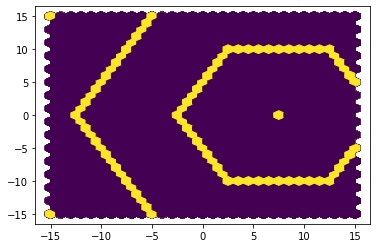

In [4]:
n = 31
delay = 10
seed = int(.5 * n ** 2)
ON = 255
OFF = 0

adj_dict = gen_adj_dict(n)
x, y = gen_hex_grid(n)
m = len(x)

C = [0 for i in range(m)]
delay_dict = {i : 0 for i in range(m)}
activated_dict = {i : False for i in range(m)}




def init():
    delay_dict[seed] = delay
    C[seed] = ON
    return ax.hexbin(x, y, C = C, gridsize = (n - 1, int(n / 2)))
        
def update(data):
    
    for node in delay_dict:
        delay_dict[node] = delay_dict[node] - 1 if delay_dict[node] > 0 else 0
    
    temp_C = C.copy()
    for hexagon in range(m):
        if temp_C[hexagon] == ON:
            C[hexagon] = OFF
            for neighbor in adj_dict[hexagon]:
                if delay_dict[neighbor] == 0:
                    delay_dict[neighbor] = delay
                    C[neighbor] = ON
                    
    if data % 10 == 0:
        C[seed] = ON
        delay_dict[seed] = delay

    
    return  ax.hexbin(x, y, C = C, gridsize = (n - 1, int(n / 2)))

fig, ax = plt.subplots()
ax.set_ylim(-n / 2 - 1, n / 2 + 1)
ax.set_xlim(-n / 2 - 1, n / 2 + 1)
mat = ax.hexbin(x, y, C = C, gridsize = (n - 1, int(n / 2)))
ani = animation.FuncAnimation(fig, update, interval=50,
                          save_count=50)

from IPython.display import HTML
HTML(ani.to_jshtml())
